# Temperature tabulation

An alternative to the ReacLib fit for strong-mediated rates is tabulating $N_A \langle \sigma v \rangle$ in terms of temperature.
A {py:obj}`TemperatureTabularRate <pynucastro.rates.temperature_tabular_rate.TemperatureTabularRate>` can express this type of rate.

In [1]:
import pynucastro as pyna
import numpy as np

Let's consider a new tabulation of the rate for ${}^{16}\mathrm{O}(p,\gamma){}^{17}\mathrm{F}$ from Iliadis et al. 2022 {cite:t}`iliadis:2022`.  The data for
the rate is given in the appendix as:

In [2]:
data = """
0.003 4.164E-41 4.338E-41 4.517E-41 1.042
0.004 1.343E-36 1.399E-36 1.457E-36 1.042
0.005 2.154E-33 2.244E-33 2.336E-33 1.042
0.006 5.980E-31 6.230E-31 6.486E-31 1.042
0.007 5.332E-29 5.555E-29 5.783E-29 1.042
0.008 2.162E-27 2.253E-27 2.345E-27 1.042
0.009 4.935E-26 5.142E-26 5.353E-26 1.042
0.010 7.290E-25 7.595E-25 7.907E-25 1.042
0.011 7.668E-24 7.988E-24 8.317E-24 1.042
0.012 6.148E-23 6.405E-23 6.669E-23 1.042
0.013 3.951E-22 4.117E-22 4.286E-22 1.042
0.014 2.114E-21 2.203E-21 2.293E-21 1.042
0.015 9.699E-21 1.010E-20 1.052E-20 1.042
0.016 3.903E-20 4.067E-20 4.234E-20 1.042
0.018 4.578E-19 4.770E-19 4.966E-19 1.042
0.020 3.809E-18 3.968E-18 4.131E-18 1.042
0.025 2.639E-16 2.749E-16 2.862E-16 1.042
0.030 6.641E-15 6.919E-15 7.204E-15 1.042
0.040 7.211E-13 7.513E-13 7.822E-13 1.042
0.050 1.998E-11 2.082E-11 2.167E-11 1.042
0.060 2.497E-10 2.601E-10 2.708E-10 1.042
0.070 1.865E-09 1.943E-09 2.023E-09 1.042
0.080 9.751E-09 1.016E-08 1.058E-08 1.042
0.090 3.933E-08 4.098E-08 4.267E-08 1.042
0.100 1.304E-07 1.359E-07 1.414E-07 1.042
0.110 3.709E-07 3.865E-07 4.024E-07 1.042
0.120 9.340E-07 9.731E-07 1.013E-06 1.042
0.130 2.129E-06 2.219E-06 2.310E-06 1.042
0.140 4.472E-06 4.659E-06 4.851E-06 1.042
0.150 8.764E-06 9.131E-06 9.507E-06 1.042
0.160 1.620E-05 1.688E-05 1.757E-05 1.042
0.180 4.791E-05 4.991E-05 5.197E-05 1.042
0.200 1.216E-04 1.266E-04 1.319E-04 1.042
0.250 7.781E-04 8.106E-04 8.440E-04 1.042
0.300 3.176E-03 3.309E-03 3.446E-03 1.042
0.350 9.703E-03 1.011E-02 1.053E-02 1.042
0.400 2.426E-02 2.528E-02 2.632E-02 1.042
0.450 5.244E-02 5.464E-02 5.689E-02 1.042
0.500 1.016E-01 1.058E-01 1.102E-01 1.042
0.600 3.000E-01 3.126E-01 3.255E-01 1.042
0.700 7.083E-01 7.381E-01 7.683E-01 1.042
0.800 1.432E+00 1.493E+00 1.554E+00 1.042
0.900 2.590E+00 2.699E+00 2.809E+00 1.042
1.000 4.301E+00 4.482E+00 4.666E+00 1.042
1.250 1.180E+01 1.229E+01 1.280E+01 1.042
1.500 2.526E+01 2.632E+01 2.740E+01 1.042
1.750 4.612E+01 4.806E+01 5.005E+01 1.042
2.000 7.545E+01 7.863E+01 8.188E+01 1.042
2.500 1.618E+02 1.686E+02 1.755E+02 1.042
3.000 2.851E+02 2.971E+02 3.093E+02 1.042
3.500 4.406E+02 4.591E+02 4.779E+02 1.042"""

Here the first column is $T_9$, the next 3 columns are the low, median, and high value of the rate, and the last column is factor uncertainty from the Monte Carlo analysis.  We'll just use $T_9$ and the median value

In [3]:
T9 = []
rate = []
for line in data.split("\n"):
    if line != "":
        fields = line.split()
        T9.append(float(fields[0]))
        rate.append(float(fields[2]))

In [4]:
T9 = np.asarray(T9)
rate = np.asarray(rate)

We can plot the rate data

In [5]:
import matplotlib.pyplot as plt

Text(0, 0.5, '$N_A \\langle \\sigma v\\rangle$')

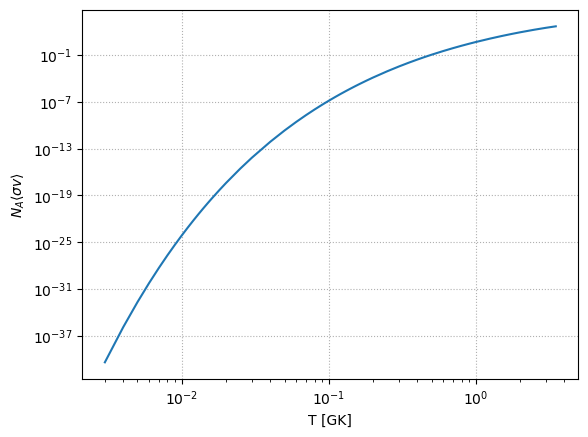

In [6]:
fig, ax = plt.subplots()
ax.loglog(T9, rate)
ax.grid(ls=":")
ax.set_xlabel("T [GK]")
ax.set_ylabel(r"$N_A \langle \sigma v\rangle$")

Now we can create a `TemperatureTabularRate` from this data.

In [7]:
from pynucastro.rates import TemperatureTabularRate

We need to pass in the $\log_{10}(T_9)$ and $\log_{10}(\mbox{rate})$.

In [8]:
r = TemperatureTabularRate(np.log10(T9), np.log10(rate),
                           reactants=[pyna.Nucleus("o16"), pyna.Nucleus("p")],
                           products=[pyna.Nucleus("f17")])

This will use cubic interpolation internally to find the rate at any temperature
(within the bounds of the original data).  We can plot this and see that it
looks like the raw data.

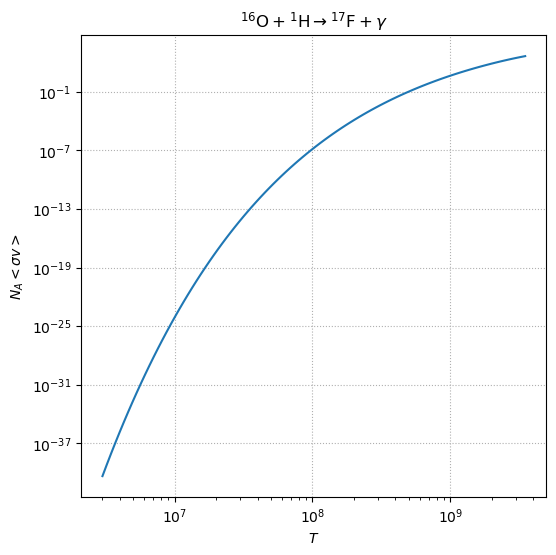

In [9]:
fig = r.plot()

Now we can look at the relative difference between this rate and the
version in ReacLib.

In [10]:
r_rl = pyna.ReacLibLibrary().get_rate_by_name("o16(p,g)f17")

In [11]:
Ts = np.logspace(np.log10(r.table_Tmin), np.log10(r.table_Tmax), 100)
rv_rl = np.array([r_rl.eval(T) for T in Ts])
rv_new = np.array([r.eval(T) for T in Ts])

In [12]:
err = np.abs(rv_rl - rv_new) / rv_rl

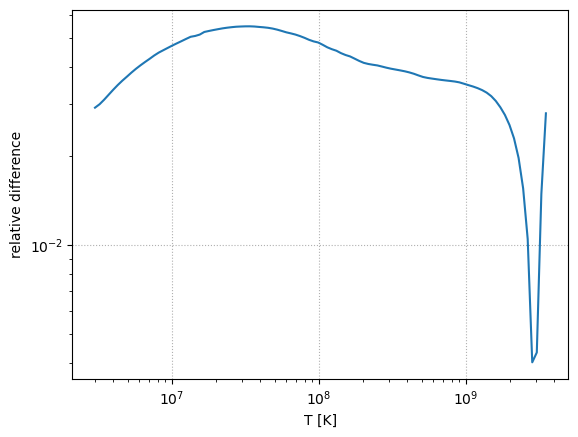

In [13]:
fig, ax = plt.subplots()
ax.loglog(Ts, err)
ax.set_xlabel("T [K]")
ax.set_ylabel("relative difference")
ax.grid(ls=":")

We see that there is a maximum of a 5% difference in the rates.